<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - In-class Exam



---
#### Guidelines 
- This is your notebook for your in-class midterm exam. 
- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, if you do, your answers will be considered invalid = **0%**).
- The in-class exam is **10%** of your total midterm score.
- During the exam you can only have the following websites open in your browser:
    * [ECON-628-01 github][1]
    * ECON-628-01-yourgithubusersname 
    * [StackOverflow][2]  
- If we noticed that your computer browser has other websites open, you will be asked to **close your computer, leave the class, and will get an score of 0%**
- Remember: if you are using code from someone else/online (StackOverflow) you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
    


- Once you are done with your exam use this [link][3] to **submit** the GitHub link to your take home exam.
[1]:https://github.com/jrcmalunay/ECON628-01 "ECON-628-01 github"
[2]:http://stackoverflow.com "StackOverflow"
[3]: https://docs.google.com/forms/d/e/1FAIpQLSercXrXIky91taz98tPviIqA8C0FaQZ_WIfNoRYxMbV5wPtkg/viewform "link"

---



### Dataset 
This dataset comes from the Sleep and the allocation of time [paper][1] by Biddle, Jeff and Hamermesh, Daniel where using aggregated data for 12 countries, a cross section of microeconomic data, and a panel of households, they demonstrate that increases in time in the labor market reduce sleep!!!! The variables are:
https://www.jstor.org/stable/2937618?seq=1#page_scan_tab_contents

| **Name**   |      **Description**     |  
|----------|:-------------:|
| age | in years | 
| black | =1 if black | 
| case | identifier | 
| clerical | =1 if clerical worker |
| construc | =1 if construction worker |
| educ | years of schooling|
| earns74 | total earnings, 1974 |
| gdhlth | =1 if in good or excellent health |
| inlf |  =1 if in labor force |
|leis1  |sleep - totwrk|
|leis2  |slpnaps - totwrk|
|leis3  |rlxall - totwrk|
| smsa |  =1 if living in SMSA |
| | SMSA is the Standard Metropolitan Statistical Area, an integrated economic and social unit having a large population nucleus. It is a good indicator of living in a city.|
|lhrwage| log hourly wage|
|lothinc | log othinc, unless othinc < 0
| male |  =1 if male |
| marr | =1 if married |
| prot | =1 if Protestant |
|rlxall |slpnaps + personal activs|
| selfe  | =1 if self employed|
| sleep | minutes sleep at night, per week |
| slpnaps | minutes sleep, including naps, per week |
| south |  =1 if live in south |
| spsepay |  spousal wage income |
| spwrk75 |  =1 if spouse works |
| totwrk | minutes worked per week |
| union |  =1 if belong to union |
| worknrm | minutes work main job |
| workscnd | minutes work second job |
|exper     | age - educ - 6 |
| yngkid | =1 if children less than 3 years present |
| yrsmarr | years married |
| hrwage | hourly wage |
|agesq   |age^2|


[1]:https://core.ac.uk/download/pdf/6820141.pdf "paper"


---


---

## The Scenario
---
The PI (principal investigator) of a project you are working for, claims that nowadays people sleep "more" because access to the internet and the mechanization of labor reduces their work time. Based on this assumption, he wants to implement a literacy program that requires participants to read 1 chapter of a book one hour before their bed time and one section of an introduction to mathematics book one hour before they leave their home for work.

**He asks you to find out if people are indeed sleeping more or not, before he implements the literacy program.** 
Assume that, you don't have any other dataset but the one from the Biddle and Hamermesh paper to answer this question. 
Use all the predictive methods, you consider neccesary to give  an answer to the PI, and make sure you explain the output of your predictive analysis.


---

### Basic package imports
---

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Read/load the dataset "sleep_bh.csv" and do an initial overview of the data
    Check the shape of your data
    Cheeck the type of values
    Identify which variables have missing values
    Print a list of the indices where there are missing values
---

In [2]:
df =pd.read_csv('/home/dsi-student/Desktop/ECON628-01-dsalicath/datasets/sleep/sleep_bh.csv')

In [3]:
print df.shape
# Shape of the data

(706, 34)


In [4]:
df.head(3)

,age,black,case,clerical,construc,educ,earns74,gdhlth,inlf,leis1,...,spwrk75,totwrk,union,worknrm,workscnd,exper,yngkid,yrsmarr,hrwage,agesq
0,32,0,1,0.0,0.0,12,0,0,1,3529,...,0,3438,0,3438,0,14,0,13,7.070004,1024
1,31,0,2,0.0,0.0,14,9500,1,1,2140,...,0,5020,0,5020,0,11,0,0,1.429999,961
2,44,0,3,0.0,0.0,17,42500,1,1,4595,...,1,2815,0,2815,0,21,0,0,20.529997,1936


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,706.0,38.815864,11.342637,23.000000,29.000000,36.000000,48.000000,65.000000
black,706.0,0.049575,0.217219,0.000000,0.000000,0.000000,0.000000,1.000000
case,706.0,353.500000,203.948932,1.000000,177.250000,353.500000,529.750000,706.000000
clerical,706.0,0.182331,0.335413,0.000000,0.000000,0.000000,0.182331,1.000000
construc,706.0,0.030075,0.148366,0.000000,0.000000,0.000000,0.030075,1.000000
educ,706.0,12.780453,2.784702,1.000000,12.000000,12.000000,16.000000,17.000000
earns74,706.0,9767.705382,9323.588151,0.000000,2500.000000,8250.000000,13750.000000,42500.000000
gdhlth,706.0,0.890935,0.311942,0.000000,1.000000,1.000000,1.000000,1.000000
inlf,706.0,0.753541,0.431254,0.000000,1.000000,1.000000,1.000000,1.000000
leis1,706.0,4690.723796,908.049561,1745.000000,4109.750000,4620.000000,5203.750000,7417.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 34 columns):
age         706 non-null int64
black       706 non-null int64
case        706 non-null int64
clerical    706 non-null float64
construc    706 non-null float64
educ        706 non-null int64
earns74     706 non-null int64
gdhlth      706 non-null int64
inlf        706 non-null int64
leis1       706 non-null int64
leis2       706 non-null int64
leis3       706 non-null int64
smsa        706 non-null int64
lhrwage     532 non-null float64
lothinc     706 non-null float64
male        706 non-null int64
marr        706 non-null int64
prot        706 non-null int64
rlxall      706 non-null int64
selfe       706 non-null int64
sleep       706 non-null int64
slpnaps     706 non-null int64
south       706 non-null int64
spsepay     706 non-null int64
spwrk75     706 non-null int64
totwrk      706 non-null int64
union       706 non-null int64
worknrm     706 non-null int64
workscnd    706 non

In [7]:
print df.isnull().sum()
# MIssing data for lhrwage  and hrwage , both 174

age           0
black         0
case          0
clerical      0
construc      0
educ          0
earns74       0
gdhlth        0
inlf          0
leis1         0
leis2         0
leis3         0
smsa          0
lhrwage     174
lothinc       0
male          0
marr          0
prot          0
rlxall        0
selfe         0
sleep         0
slpnaps       0
south         0
spsepay       0
spwrk75       0
totwrk        0
union         0
worknrm       0
workscnd      0
exper         0
yngkid        0
yrsmarr       0
hrwage      174
agesq         0
dtype: int64


In [8]:
df.loc[df['lhrwage'].isnull()].T
# Print a list of the indices where there are missing values

,532,533,534,535,536,537,538,539,540,541,...,696,697,698,699,700,701,702,703,704,705
age,34.000000,44.000000,58.000000,29.000000,39.000000,41.000000,55.000000,28.000000,41.000000,46.000000,...,36.000000,47.000000,52.000000,61.000000,32.000000,45.000000,34.000000,37.000000,54.000000,30.000000
black,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
case,533.000000,534.000000,535.000000,536.000000,537.000000,538.000000,539.000000,540.000000,541.000000,542.000000,...,697.000000,698.000000,699.000000,700.000000,701.000000,702.000000,703.000000,704.000000,705.000000,706.000000
clerical,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,...,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331
construc,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,...,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075
educ,17.000000,15.000000,15.000000,16.000000,12.000000,17.000000,12.000000,12.000000,12.000000,8.000000,...,16.000000,10.000000,10.000000,17.000000,16.000000,12.000000,10.000000,12.000000,17.000000,16.000000
earns74,0.000000,0.000000,0.000000,13750.000000,9500.000000,42500.000000,9500.000000,10500.000000,0.000000,9500.000000,...,9500.000000,9500.000000,0.000000,27500.000000,10500.000000,5500.000000,2500.000000,3500.000000,32500.000000,6750.000000
gdhlth,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
inlf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
leis1,3922.000000,5635.000000,4370.000000,4672.000000,3310.000000,3802.000000,5792.000000,7280.000000,3777.000000,5500.000000,...,4776.000000,5882.000000,4797.000000,4362.000000,4707.000000,5069.000000,5885.000000,4719.000000,5149.000000,4747.000000


In [9]:
df.loc[df['hrwage'].isnull()].T
# Print a list of the indices where there are missing values

,532,533,534,535,536,537,538,539,540,541,...,696,697,698,699,700,701,702,703,704,705
age,34.000000,44.000000,58.000000,29.000000,39.000000,41.000000,55.000000,28.000000,41.000000,46.000000,...,36.000000,47.000000,52.000000,61.000000,32.000000,45.000000,34.000000,37.000000,54.000000,30.000000
black,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
case,533.000000,534.000000,535.000000,536.000000,537.000000,538.000000,539.000000,540.000000,541.000000,542.000000,...,697.000000,698.000000,699.000000,700.000000,701.000000,702.000000,703.000000,704.000000,705.000000,706.000000
clerical,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,...,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331,0.182331
construc,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,...,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075,0.030075
educ,17.000000,15.000000,15.000000,16.000000,12.000000,17.000000,12.000000,12.000000,12.000000,8.000000,...,16.000000,10.000000,10.000000,17.000000,16.000000,12.000000,10.000000,12.000000,17.000000,16.000000
earns74,0.000000,0.000000,0.000000,13750.000000,9500.000000,42500.000000,9500.000000,10500.000000,0.000000,9500.000000,...,9500.000000,9500.000000,0.000000,27500.000000,10500.000000,5500.000000,2500.000000,3500.000000,32500.000000,6750.000000
gdhlth,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
inlf,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
leis1,3922.000000,5635.000000,4370.000000,4672.000000,3310.000000,3802.000000,5792.000000,7280.000000,3777.000000,5500.000000,...,4776.000000,5882.000000,4797.000000,4362.000000,4707.000000,5069.000000,5885.000000,4719.000000,5149.000000,4747.000000


## 2. Drop missing values (not the best practice), but OK for exam 
    Once you drop the missing values, check that the list of binary variables have values of 1 an 0
        Note: at this point the inlf predictor/variable should have the value of 1
---

In [10]:
def missing_values(data):
    if data.isnull().sum() > 0:
        print "Number of missing values dropped = ",  data.isnull().sum()
        ''' here you can drop missing variables'''
        data.fillna((data.drop), inplace=True)
    elif data.isnull().sum() == 0:
        print "Number of missing values =  0"
        
# Defining function to remove missing values, inspired by classnotes
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [11]:
missing_values(df.lhrwage )

Number of missing values dropped =  174


In [12]:
missing_values(df.hrwage)

Number of missing values dropped =  174


In [13]:
print df.isnull().sum()

age         0
black       0
case        0
clerical    0
construc    0
educ        0
earns74     0
gdhlth      0
inlf        0
leis1       0
leis2       0
leis3       0
smsa        0
lhrwage     0
lothinc     0
male        0
marr        0
prot        0
rlxall      0
selfe       0
sleep       0
slpnaps     0
south       0
spsepay     0
spwrk75     0
totwrk      0
union       0
worknrm     0
workscnd    0
exper       0
yngkid      0
yrsmarr     0
hrwage      0
agesq       0
dtype: int64


## 3. Check for correlations
    Implement a correlation heatmap
---

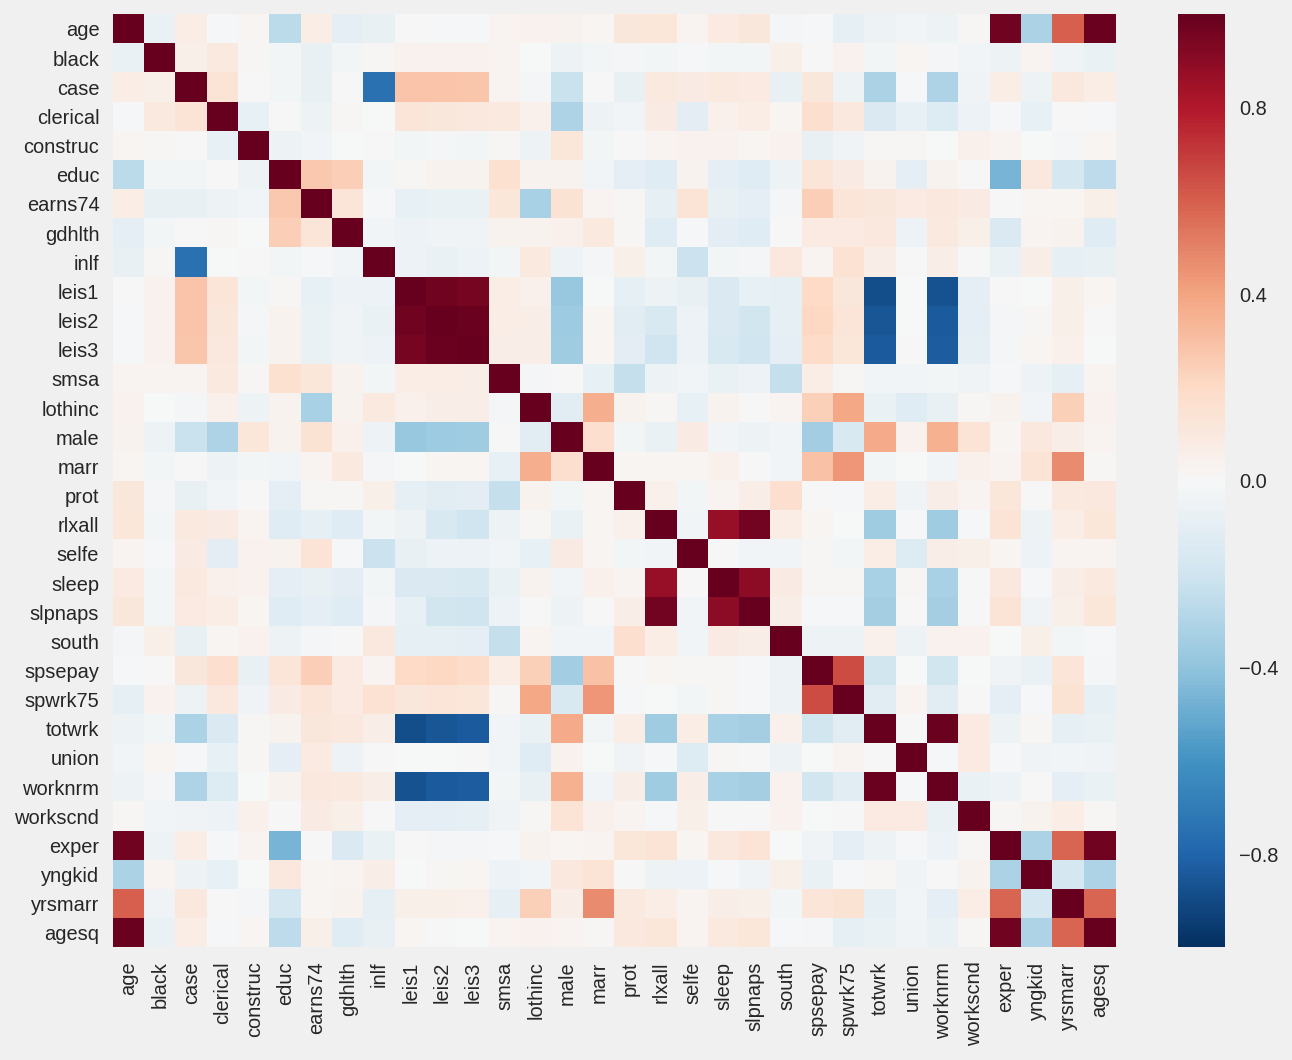

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca()
sns.heatmap(df.corr(), ax=ax)
plt.show()

## 4.1 Predictions
    Define y (mins sleep at night, per week)
    Define X (where X are your predictors => make sure to include the correct variables, i.e. exclude y, case, lothinc, and **other** variables)
    Standarized your Xs
    Train test split:
        splits your data into train test, 
        assigns a size of 30% to your test set, and use random_state=10
        print the shape of your train (X, y) and test (X, y)
---

In [15]:
# Want to use X that may explain Y => Investigated heatmap and likely variables to explain sleep (or lack of)

In [16]:
X = df[['age','agesq','earns74','gdhlth','inlf','smsa','male','marr','selfe','south','spsepay','spwrk75','totwrk','exper','yngkid','yrsmarr','union']]
y = df.sleep.values

# Defining y and Xs

In [17]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler() 
Xn = ss.fit_transform(X)
# Standarized my Xs

In [18]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xn, y, test_size=0.3, random_state=10)
print X_train.shape, X_test.shape
print "\n======\n"
print y_train.shape, y_test.shape
# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

(494, 17) (212, 17)


(494,) (212,)


/home/dsi-student/anaconda2/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 4.2 Machine Learning models 
    OLS, Regularization methods and evaluate the performance of your models on the train and test datasets
    Cross validate at least 10 times the R^2 scores of your models and print the average R^2 scores 
    For the OLS implement an scatter plot that shows the relation between your predicted values and the y_test values (the actual values)
    
---

## 4.2.1 OLS
    
---

In [19]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [21]:
def rsquare_meansquare_error(train_y, test_y, train_X, test_X, test, best_model):
    """ first we need to predict on the test and train data"""
    y_train_pred = best_model.predict(train_X)
    y_test_pred = best_model.predict(test_X)
    
    """ We call the MSE in the following lines"""
    print ('MSE ' + test + ' train data: %.2f, test data: %.2f' % (
        mean_squared_error(train_y, y_train_pred),
        mean_squared_error(test_y, y_test_pred)))
    
    """ We call the R^2 in the following lines"""
    print('R^2 ' + test + ' train data: %.2f, test data: %.2f' % (
        r2_score(train_y, y_train_pred),
        r2_score(test_y, y_test_pred)))

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [22]:
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "OLS", lr)

MSE OLS train data: 157812.86, test data: 200919.46
R^2 OLS train data: 0.16, test data: 0.09


In [23]:
# Fitting my model
model = lr.fit(X, y)

# Print the shape of predictions
predictions = lr.predict(X)
predictions.shape

(706,)

In [24]:
print df['sleep'].mean()
print predictions.mean()

3266.35552408
3266.35552408


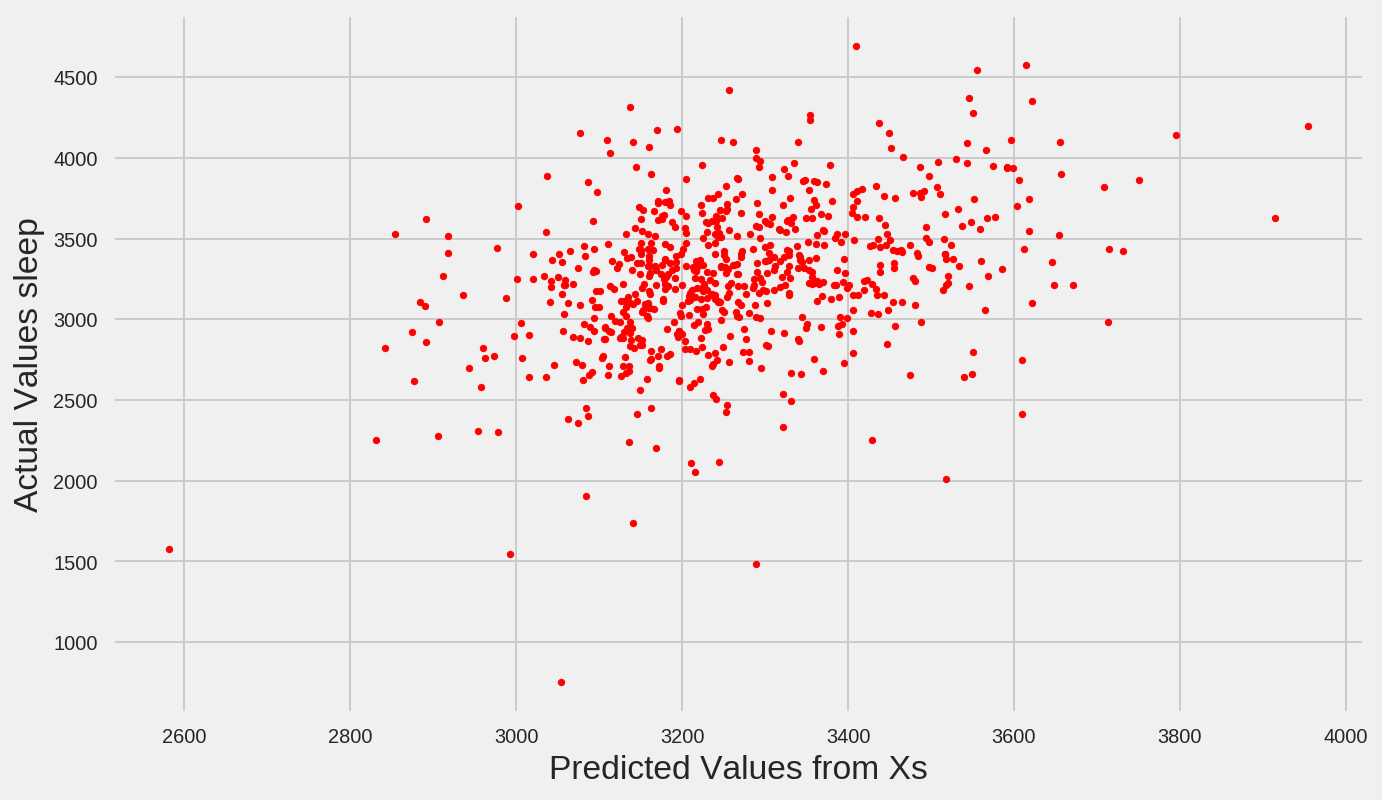

MSE: 169310.485832


In [25]:
fig = plt.figure(figsize=(10,6))
plt.scatter(predictions, y, s=10, c='r', marker='o')
plt.xlabel("Predicted Values from Xs")
plt.ylabel("Actual Values sleep")
plt.show()
print "MSE:", mean_squared_error(y, predictions)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/Linear_Regression_LAB_solutions.ipynb

## 4.2.2 Regularization
    
---

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV

In [27]:
# ridge regression
ridge_alphas = np.logspace(0, 5, 100)
optimal_ridge = RidgeCV(alphas=ridge_alphas, cv=10)
optimal_ridge.fit(X_train, y_train)
print (optimal_ridge.alpha_)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

117.681195243


In [28]:
# Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

# Fit the Ridge regression
ridge.fit(X_train, y_train)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

Ridge(alpha=117.68119524349979, copy_X=True, fit_intercept=True,
   max_iter=None, normalize=False, random_state=None, solver='auto',
   tol=0.001)

In [29]:
# Evaluate the Ridge Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Ridge", ridge)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Ridge train data: 159395.60, test data: 201203.49
R^2 Ridge train data: 0.15, test data: 0.08


In [30]:
# lasso regression

In [31]:
## Find the optimal alpha
optimal_lasso = LassoCV(n_alphas=300, cv=10, verbose=1)
optimal_lasso.fit(X_train, y_train)
print optimal_lasso.alpha_

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

21.1786509681


...........................................................................[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.2s finished


In [32]:
# Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit my regression
lasso.fit(X_train, y_train)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

Lasso(alpha=21.178650968109768, copy_X=True, fit_intercept=True,
   max_iter=1000, normalize=False, positive=False, precompute=False,
   random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [33]:
# Evaluate the Lasso Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Lasso", lasso)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Lasso train data: 161440.50, test data: 203668.65
R^2 Lasso train data: 0.14, test data: 0.07


In [34]:
# Elastic Net Regression

In [35]:
# Find the optimal alphas
l1_ratios = np.linspace(0.01, 1.0, 50)
optimal_enet = ElasticNetCV(l1_ratio=l1_ratios, n_alphas=300, cv=5, verbose=1)
optimal_enet.fit(X_train, y_train)
print optimal_enet.alpha_
print optimal_enet.l1_ratio_

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

21.6736341338
1.0


[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:   58.4s finished


In [36]:
#  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

# Fitting my model
enet.fit(X_train, y_train)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

ElasticNet(alpha=21.673634133844836, copy_X=True, fit_intercept=True,
      l1_ratio=1.0, max_iter=1000, normalize=False, positive=False,
      precompute=False, random_state=None, selection='cyclic', tol=0.0001,
      warm_start=False)

In [37]:
# Evaluate the Elastic Net Regression
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Elastic Net", enet)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Elastic Net train data: 161517.45, test data: 203702.56
R^2 Elastic Net train data: 0.14, test data: 0.07


## 4.2.3 What are the features that are the best predictors of mins sleep at night, per week
    What are the features with coefficients greater than 0
---

In [38]:
# defining a function to print the coefficients, their absolute values and the non-absolute values
def best_reg_method(X, best_regulari):
    method_coefs = pd.DataFrame({'variable':X.columns, 
                                 'coef':best_regulari.coef_, 
                                 'abs_coef':np.abs(best_regulari.coef_)})
    method_coefs.sort_values('abs_coef', inplace=True, ascending=False)
    return method_coefs.head(10)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [39]:
best_reg_method(X, lasso)

,abs_coef,coef,variable
12,130.677584,-130.677584,totwrk
9,23.415241,23.415241,south
13,20.093038,20.093038,exper
5,5.887252,-5.887252,smsa
0,0.000000,0.000000,age
15,0.000000,0.000000,yrsmarr
14,0.000000,-0.000000,yngkid
11,0.000000,0.000000,spwrk75
10,0.000000,-0.000000,spsepay
8,0.000000,-0.000000,selfe


## 4.2.3.1 Bonus
    Define a function that creates and prints the distribution of residuals on the train and test data from all the methods
---

In [40]:
from sklearn.cross_validation import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(Xn, y, test_size=0.30, random_state=10)
print Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape 

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

(494, 17) (212, 17) (494,) (212,)


In [41]:
## define a linear regression model
lr = LinearRegression()

## fit your model
lr.fit(Xtrain, ytrain)

## predict values => you predict on the test, I am predict on the train so we can see how the model performs
ytrain_pred = lr.predict(Xtrain)
ytest_pred = lr.predict(Xtest)
# print(lr.coef_)
# print "====\n"

## Cross validate = 10
linreg_scores = cross_val_score(lr, Xtrain, ytrain, cv=10)

## Print the R^2
print linreg_scores

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

[ 0.15464494  0.0124687  -0.07944746 -0.0443207   0.05108082  0.19837332
  0.1192445   0.05303664  0.1264604   0.0004747 ]


In [42]:
## Implement the Ridge Regression
ridge = Ridge(alpha=optimal_ridge.alpha_)

## Fit the Ridge regression
ridge.fit(Xtrain, ytrain)
ytrain_pred_ridge = ridge.predict(Xtrain)
ytest_pred_ridge = ridge.predict(Xtest)
# print(ridge.coef_)
# print "=====\n"


## Cross validate = 10
ridge_scores = cross_val_score(ridge, Xtrain, ytrain, cv=10)
## Print the R^2
print ridge_scores
print "Average R^2 Ridge score: %.3f" % (np.mean(ridge_scores))

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

[ 0.13677504  0.03494408 -0.005823    0.00042361  0.07481748  0.18301318
  0.1112822   0.0382909   0.12485121  0.05148895]
Average R^2 Ridge score: 0.075


In [43]:
##  Create a model Enet
enet = ElasticNet(alpha=optimal_enet.alpha_, l1_ratio=optimal_enet.l1_ratio_)

## Fit your model
enet.fit(Xtrain, ytrain)

## predict
ytrain_pred_enet = enet.predict(Xtrain)
ytest_pred_enet = enet.predict(Xtest)
# print(enet.coef_)
# print "=====\n"

## Cross validate the scores and print the mean of the scores
enet_scores = cross_val_score(enet, Xtrain, ytrain, cv=10)
print enet_scores
print "Average R^2 ElasticNet score: %.3f" % (np.mean(enet_scores))

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

[ 0.1541481   0.07435804  0.04447203  0.03113448  0.08500193  0.20378958
  0.14056072  0.01881589  0.18988757  0.03520561]
Average R^2 ElasticNet score: 0.098


In [44]:
## Implement the Lasso Regression
lasso = Lasso(alpha=optimal_lasso.alpha_)

## fit your regression
lasso.fit(Xtrain, ytrain)
ytrain_pred_lasso = lasso.predict(Xtrain)
ytest_pred_lasso = lasso.predict(Xtest)
# print(lasso.coef_)
# print "====\n"

lasso_scores = cross_val_score(lasso, Xtrain, ytrain, cv=10)
print lasso_scores
print "Average R^2 Lasso score: %.3f" % (np.mean(lasso_scores))

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

[ 0.15445832  0.07376684  0.04328615  0.03052246  0.08542481  0.20422007
  0.14109892  0.01963153  0.18981919  0.03572444]
Average R^2 Lasso score: 0.098


In [45]:
# model residuals on training data:
ols_resd_train  = ytrain - ytrain_pred
ridge_resd_train = ytrain - ytrain_pred_ridge
lasso_resd_train = ytrain - ytrain_pred_lasso
enet_resd_train = ytrain - ytrain_pred_enet

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb

In [46]:
def residualplot(ols_data, ridge_data, lasso_data, enet_data):
    fig, axarr = plt.subplots(1, 4, figsize=(18, 6))

    sns.distplot(ols_data, bins=50, hist=True, kde=False, 
             color='steelblue', ax=axarr[0], label='OLS residuals')


    sns.distplot(ridge_data, bins=50, hist=True, kde=False, 
             color='darkred', ax=axarr[1], label='Ridge residuals')


    sns.distplot(lasso_data, bins=50, hist=True, kde=False, 
             color='darkgoldenrod', ax=axarr[2], label='Lasso residuals')

    sns.distplot(enet_data, bins=50, hist=True, kde=False, 
             color='g', ax=axarr[3], label='ElasticNet residuals')

# classnotes, used notebook since github wouldn't load
# http://localhost:8889/notebooks/lectures/feb_27_2017/OLS_CV_Regularization_demo.ipynb
# With more time, I would change the label as being possible to modify in the function

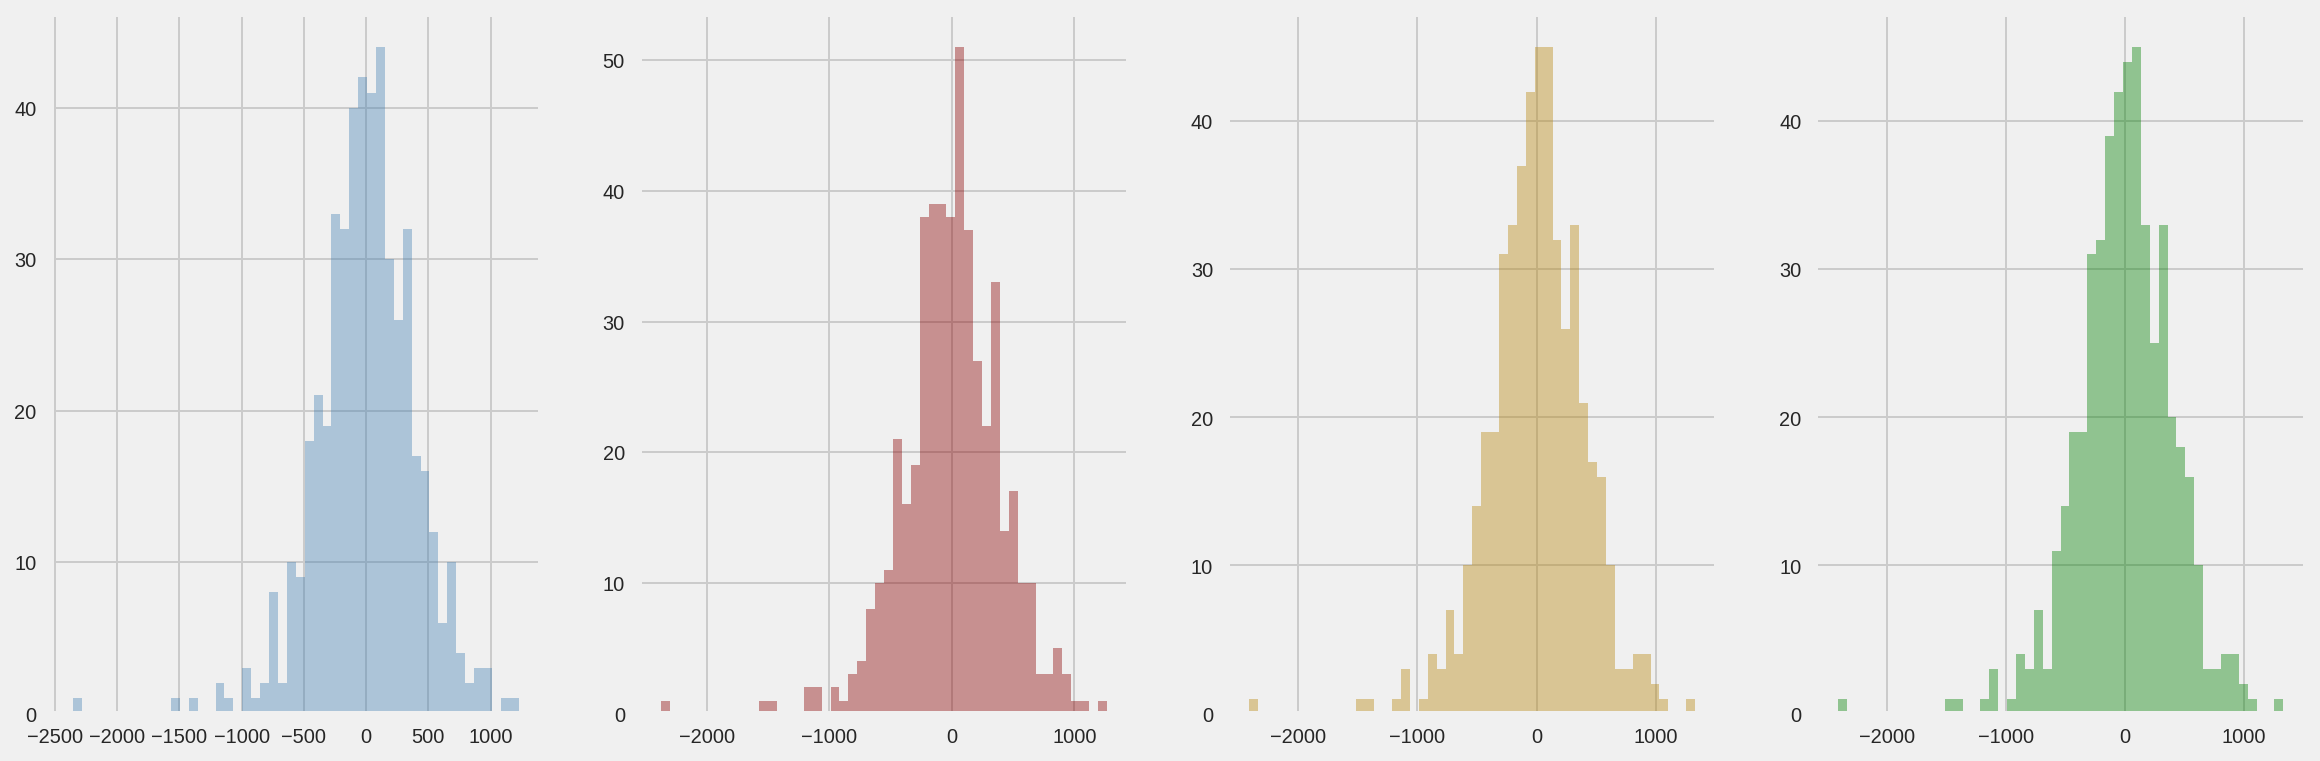

In [47]:
residualplot(ols_resd_train, ridge_resd_train, lasso_resd_train, enet_resd_train)

## 4.2.4 Regression Tree 
    Gridsearch your tree
    Print the best parameters and best score from your gridsearch.
    Evaluate the performance of your tree
    Print the features that best explain your Y, are these features the same as the features you found before from the regularization methods or OLS
    
    OPTIONAL: Visualize the tree ONLY if your computer lets you do it. Your grade won't be penalized for not printing the tree, nor you will receive extra points for visualization the tree
---

In [48]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

# Gridsearch
params = {"max_depth": [3,5,10,20],
          "max_features": [None, "auto"],
          "min_samples_leaf": [1, 3, 5, 7, 10],
          "min_samples_split": [2, 5, 7],
           "criterion" : ['mse']
         }

# Crossvalidate 
from sklearn.grid_search import GridSearchCV
dtr_gs = GridSearchCV(dtr, params, n_jobs=-1, cv=5, verbose=1)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

/home/dsi-student/anaconda2/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [49]:
# Fit the regresion tree
dtr_gs.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'max_features': [None, 'auto'], 'min_samples_split': [2, 5, 7], 'criterion': ['mse'], 'max_depth': [3, 5, 10, 20], 'min_samples_leaf': [1, 3, 5, 7, 10]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [50]:
# Print Best Estimator, parameters and score

dtr_best = dtr_gs.best_estimator_ 

print "best estimator", dtr_best
print "\n==========\n"
print "best parameters",  dtr_gs.best_params_
print "\n==========\n"
print "best score", dtr_gs.best_score_

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

best estimator DecisionTreeRegressor(criterion='mse', max_depth=3, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=7, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')


best parameters {'max_features': None, 'min_samples_split': 2, 'criterion': 'mse', 'max_depth': 3, 'min_samples_leaf': 7}


best score 0.0687082896359


In [51]:
# Print the features that best explain my Y
def feature_importance(X, best_model):
    feature_importance = pd.DataFrame({'feature':X.columns, 'importance':best_model.feature_importances_})
    feature_importance.sort_values('importance', ascending=False, inplace=True)
    return feature_importance

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [52]:
feature_importance(X, dtr_best)

,feature,importance
12,totwrk,0.720281
13,exper,0.115757
15,yrsmarr,0.059411
9,south,0.057960
10,spsepay,0.046592
0,age,0.000000
14,yngkid,0.000000
11,spwrk75,0.000000
8,selfe,0.000000
1,agesq,0.000000


In [53]:
# Predict 
y_pred_dtr= dtr_best.predict(X_test)
y_pred_dtr

array([ 3130.95652174,  3303.9       ,  3572.79166667,  3330.70588235,
        3572.79166667,  3303.9       ,  3382.59459459,  3382.59459459,
        3130.95652174,  3572.79166667,  2653.15384615,  3130.95652174,
        3183.88235294,  3303.9       ,  3382.59459459,  3382.59459459,
        3130.95652174,  3572.79166667,  3382.59459459,  3183.88235294,
        3130.95652174,  3130.95652174,  3130.95652174,  3382.59459459,
        3130.95652174,  3303.9       ,  3130.95652174,  3130.95652174,
        3130.95652174,  3572.79166667,  3130.95652174,  3572.79166667,
        3130.95652174,  3572.79166667,  3130.95652174,  3330.70588235,
        3572.79166667,  3303.9       ,  3130.95652174,  3572.79166667,
        3382.59459459,  3183.88235294,  3130.95652174,  3130.95652174,
        3130.95652174,  3130.95652174,  3330.70588235,  2653.15384615,
        3330.70588235,  3130.95652174,  3382.59459459,  3183.88235294,
        3303.9       ,  3382.59459459,  3303.9       ,  3183.88235294,
      

In [54]:
# Evaluate the Regression Tree performance on my train and test data
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Regression tree", dtr_best)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Regression tree train data: 152526.65, test data: 210519.63
R^2 Regression tree train data: 0.19, test data: 0.04


## 4.2.5 Random Forest Regression Tree
    Make sure you gridsearch your Random Forest
    Evaluate the performance
    Print the features that best explain mins sleep at night, per week 
---



In [55]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor( )

params = {'max_depth':[3,4,5],  
          'max_leaf_nodes':[5,6,7], 
          'min_samples_split':[3,4],
          'n_estimators': [100]
         }

estimator_rfr = GridSearchCV(forest, params, n_jobs=-1,  cv=5,verbose=1)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

In [56]:
# Fit my random forest tree
estimator_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:   55.6s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'min_samples_split': [3, 4], 'max_leaf_nodes': [5, 6, 7], 'n_estimators': [100], 'max_depth': [3, 4, 5]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=1)

In [57]:
# Print the best estimator, parameters and score
rfr_best = estimator_rfr.best_estimator_
print "best estimator", rfr_best
print "\n==========\n"
print "best parameters", estimator_rfr.best_params_
print "\n==========\n"
print "best score", estimator_rfr.best_score_

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

best estimator RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=5,
           max_features='auto', max_leaf_nodes=5, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=3,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)


best parameters {'min_samples_split': 3, 'max_leaf_nodes': 5, 'n_estimators': 100, 'max_depth': 5}


best score 0.0953835154868


In [58]:
# Print the feature importance
feature_importance(X, rfr_best)

,feature,importance
12,totwrk,0.754412
13,exper,0.079858
1,agesq,0.031235
7,marr,0.024888
0,age,0.024382
4,inlf,0.024116
15,yrsmarr,0.014850
2,earns74,0.011160
10,spsepay,0.008852
5,smsa,0.006565


In [59]:
# Predict
y_pred_rfdtr= rfr_best.predict(X_test)
y_pred_rfdtr

array([ 3115.89473364,  3127.50985765,  3405.71900072,  3478.09010818,
        3522.17188242,  3240.67449225,  3372.62765176,  3343.45697705,
        3262.46887418,  3446.31018577,  2755.79794523,  3261.33895893,
        3331.13278292,  3119.43956103,  3354.30529867,  3438.48083409,
        3073.32627216,  3405.70876118,  3364.46847343,  3361.20622499,
        3127.79079076,  3249.34433927,  3125.9525279 ,  3337.8250348 ,
        3245.37555542,  3242.04824348,  3120.58789845,  3246.83820234,
        3242.18091171,  3531.65834083,  3165.19494084,  3454.85013259,
        3143.44667192,  3446.48405784,  3149.71891836,  3407.70067851,
        3464.82390532,  3132.90073763,  3246.83820234,  3457.83225047,
        3357.51412813,  3359.79165322,  3111.01361475,  3260.4997573 ,
        3237.11110881,  3115.01875026,  3472.01210224,  2963.83530616,
        3405.05668282,  3248.18428326,  3431.06024042,  3377.86421177,
        3126.89024545,  3347.32366908,  3271.83610659,  3382.11554727,
      

In [60]:
# Evaluate your model
rsquare_meansquare_error(y_train, y_test, X_train, X_test, "Random Forest Regression tree", rfr_best)

# classnotes 
# https://github.com/jrcmalunay/ECON628-01/blob/master/lab_solutions/MEGA_lab_regression_solutions.ipynb

MSE Random Forest Regression tree train data: 146458.83, test data: 211734.47
R^2 Random Forest Regression tree train data: 0.22, test data: 0.04


## 5. Based on the MSE and R^2, in your opinion which model perform best and why?
---

In [61]:
# The Random forest regression is the best performing model on this data

# It has the highest R^2 (0.24) on the train set and the lowest MSE on the train data.
# This MSE is more important to be performing well on the train set than on the test set.
# THe concern, is the disparency between the R^2 in our train (0.22) set and the test set (0.04).

# OLS is biased, due to obvious correlations (see heatmapp) between the different independent variables
# These predictions would therefor ebe biased

# Ridge, lasso and elastic are performing almost the same and out of them it looks like the ridge is performing
# slightly better. 

# The random forest is performing better than the tree regression

# It's therefore a debate between the ridge and the random forest.
# As discussed earlier, I prefer the higer R^2 over differences between the test and train set

# Our preferred model is therefore the Random Forest

## 6. Was there any trade off between bias and variance whem implementing the models?
    
---

ANS: Yes, I had high MSE throughout my models. Multicolinearity => correlation between variables
This was suspected with these variables and I was not happy with the regular OLS due to this reason.
I included many variables that leads to bias and higher variance. If exluding more variables, my bias and variance would likely go down

## 7. Explain the Bias Variance trade in the model you selected?
    
---

ANS: 
The test set is performing a little worse than the others, but is still prefered because we would rather have
a higher R^2 for the train set and a larger difference between the two sets than smaller differences, 
but lower R^2 on the train set. I traded higher explanatory power on the train set over a larger difference between the two sets. There is still a high MSE in my selected model and something that I would look more into in future analysis